<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
print('DATA_type:\n',df.dtypes)
print('\nColums Name:', df.columns.tolist())
df.info()
print('\nNumber columns and rows', df.shape)
print('\nCount of duplicates:', df.duplicated().sum())
print('\nNumber of Nan', df.isnull().sum())

DATA_type:
 ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object

Colums Name: ['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith'

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [4]:
##Write your code here
unique_industries=df[['Industry', 'ResponseId']].drop_duplicates()
count_res=unique_industries['Industry'].value_counts().reset_index()
count_res.columns=['Industry','Count']
count_res


,Industry,Count
0,Software Development,11918
1,Other:,3077
2,Fintech,1641
3,"Internet, Telecomm or Information Services",1629
4,Banking/Financial Services,1371
5,Healthcare,1277
6,Manufacturing,1265
7,Retail and Consumer Services,1264
8,Government,962
9,Media & Advertising Services,894


C:\Users\chebo\AppData\Local\Temp\ipykernel_7272\1923045454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_res, x='Count', y='Industry', palette='viridis')


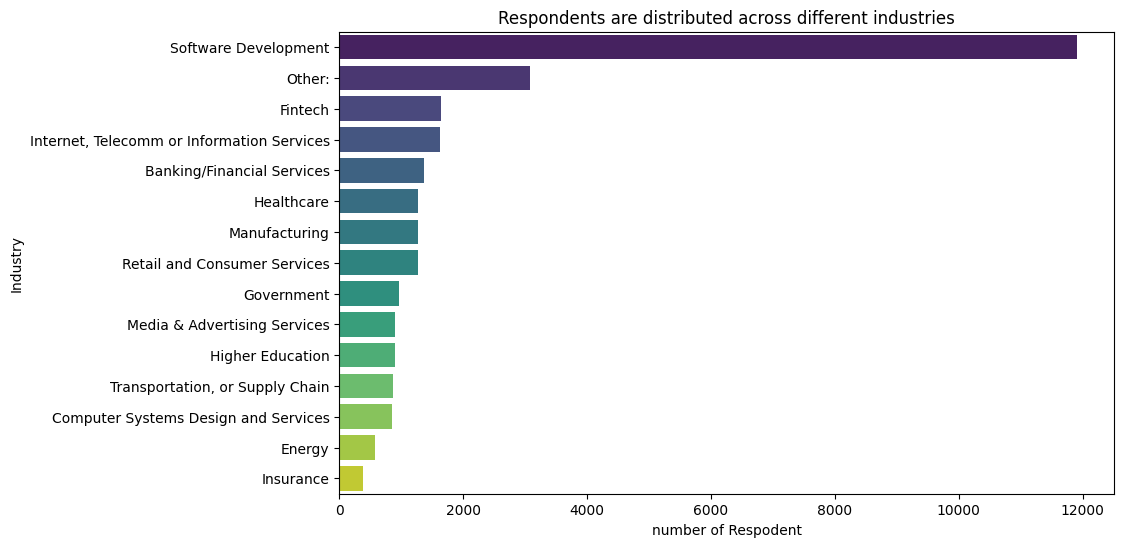

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(data=count_res, x='Count', y='Industry', palette='viridis')
plt.title('Respondents are distributed across different industries')
plt.xlabel('number of Respodent')
plt.ylabel('Industry')
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [6]:
##Write your code here
# Базовая статистика
mean_salary = df['ConvertedCompYearly'].mean()
median_salary = df['ConvertedCompYearly'].median()
std_salary = df['ConvertedCompYearly'].std()

print(f"Среднее значение (mean): {mean_salary:.2f}")
print(f"Медиана (median): {median_salary:.2f}")
print(f"Стандартное отклонение (std): {std_salary:.2f}")



Среднее значение (mean): 86155.29
Медиана (median): 65000.00
Стандартное отклонение (std): 186756.97


In [7]:
threshold = mean_salary + 3*std_salary
top_salary=df[df['ConvertedCompYearly']>threshold]
top_salary[['ConvertedCompYearly', 'ResponseId']].sort_values(by='ConvertedCompYearly', ascending=False)

,ConvertedCompYearly,ResponseId
15837,16256603.0,15838
12723,13818022.0,12724
28379,9000000.0,28380
17593,6340564.0,17594
17672,4936778.0,17673
...,...,...
13336,660660.0,13337
6735,650000.0,6736
529,650000.0,530
28381,650000.0,28382


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [9]:
##Write your code here
q1=df['ConvertedCompYearly'].quantile(0.25)
q3=df['ConvertedCompYearly'].quantile(0.75)
IQR=q3-q1

lower=q1-1.5*IQR
upper=q3+1.5*IQR
Outliers=df[
    (df['ConvertedCompYearly']<lower)|
    (df['ConvertedCompYearly']>upper)
    ]

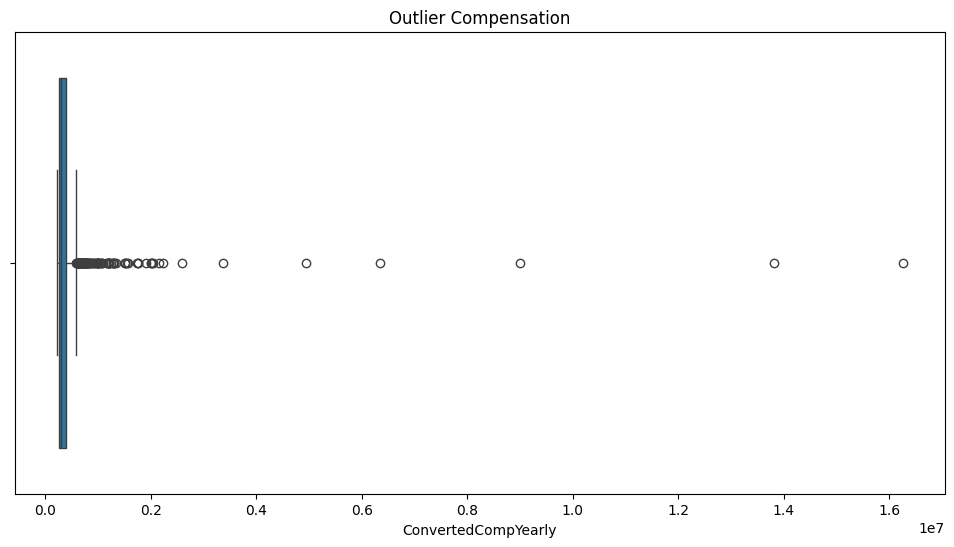

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data=Outliers, x='ConvertedCompYearly')
plt.title('Outlier Compensation')
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [16]:
##Write your code here
df=df[
    (df['ConvertedCompYearly']>=lower)&
    (df['ConvertedCompYearly']<=upper)
    ]

In [18]:
df.shape

(22457, 115)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [4]:
##Write your code here
df_number=df.select_dtypes(include='number').skew()
df_number

C:\Users\chebo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
C:\Users\chebo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\chebo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1272: RuntimeWarning: overflow encountered in scalar power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


ResponseId             7.255014e-17
CompTotal                       NaN
WorkExp                1.241684e+00
JobSatPoints_1         1.721981e+00
JobSatPoints_4         3.378496e+00
JobSatPoints_5         2.764076e+00
JobSatPoints_6         1.391895e+00
JobSatPoints_7         1.516195e+00
JobSatPoints_8         1.666892e+00
JobSatPoints_9         1.996933e+00
JobSatPoints_10        2.638669e+00
JobSatPoints_11        2.777760e+00
ConvertedCompYearly    5.292175e+01
JobSat                -9.999814e-01
dtype: float64

In [26]:
ag_map={"18-24 years old": 21,
        "25-34 years old": 29.5,
        "35-44 years old": 39.5,
        "45-54 years old": 49.5,
        "55-64 years old": 59.5,
        "65 years or older": 65
}
df['Age_num']=df['Age'].map(ag_map)

In [28]:
df['Age_num'].corr(df['ConvertedCompYearly'])

np.float64(0.3684864118595903)

In [32]:
cor= df.select_dtypes(include='number').corrwith(df['Age_num'])
cor

ResponseId            -0.040293
CompTotal             -0.021744
WorkExp                0.844540
JobSatPoints_1        -0.039018
JobSatPoints_4        -0.068410
JobSatPoints_5        -0.096637
JobSatPoints_6        -0.051923
JobSatPoints_7        -0.083922
JobSatPoints_8        -0.051896
JobSatPoints_9        -0.083570
JobSatPoints_10       -0.110531
JobSatPoints_11       -0.106244
ConvertedCompYearly    0.368486
JobSat                 0.067389
Age_num                1.000000
dtype: float64

In [33]:
cor1= df.select_dtypes(include='number').corr()
cor1

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Age_num
ResponseId,1.000000,-0.014098,-0.039416,0.014194,0.002130,0.007478,0.008950,0.020057,0.004989,0.022193,0.011755,0.011030,-0.012948,-0.020004,-0.040293
CompTotal,-0.014098,1.000000,-0.018013,0.017761,0.004478,0.025861,0.011577,0.022383,0.010580,0.007242,0.011561,0.018388,0.030847,-0.007520,-0.021744
WorkExp,-0.039416,-0.018013,1.000000,-0.032388,-0.057005,-0.094126,-0.063702,-0.097756,-0.047072,-0.088181,-0.105905,-0.101986,0.408438,0.092493,0.844540
JobSatPoints_1,0.014194,0.017761,-0.032388,1.000000,0.430698,0.634049,0.617106,0.600079,0.623773,0.597856,0.586337,0.613106,-0.058170,0.091201,-0.039018
JobSatPoints_4,0.002130,0.004478,-0.057005,0.430698,1.000000,0.508031,0.425768,0.437171,0.419233,0.460950,0.480492,0.501636,-0.095050,0.031400,-0.068410
JobSatPoints_5,0.007478,0.025861,-0.094126,0.634049,0.508031,1.000000,0.605418,0.598544,0.623889,0.616946,0.634268,0.687984,-0.185850,0.053042,-0.096637
JobSatPoints_6,0.008950,0.011577,-0.063702,0.617106,0.425768,0.605418,1.000000,0.669685,0.629271,0.622600,0.583116,0.594364,-0.090162,0.043408,-0.051923
JobSatPoints_7,0.020057,0.022383,-0.097756,0.600079,0.437171,0.598544,0.669685,1.000000,0.683791,0.650530,0.639103,0.609743,-0.159449,0.040644,-0.083922
JobSatPoints_8,0.004989,0.010580,-0.047072,0.623773,0.419233,0.623889,0.629271,0.683791,1.000000,0.645305,0.613689,0.615714,-0.100068,0.060597,-0.051896
JobSatPoints_9,0.022193,0.007242,-0.088181,0.597856,0.460950,0.616946,0.622600,0.650530,0.645305,1.000000,0.649544,0.639383,-0.125813,0.046495,-0.083570


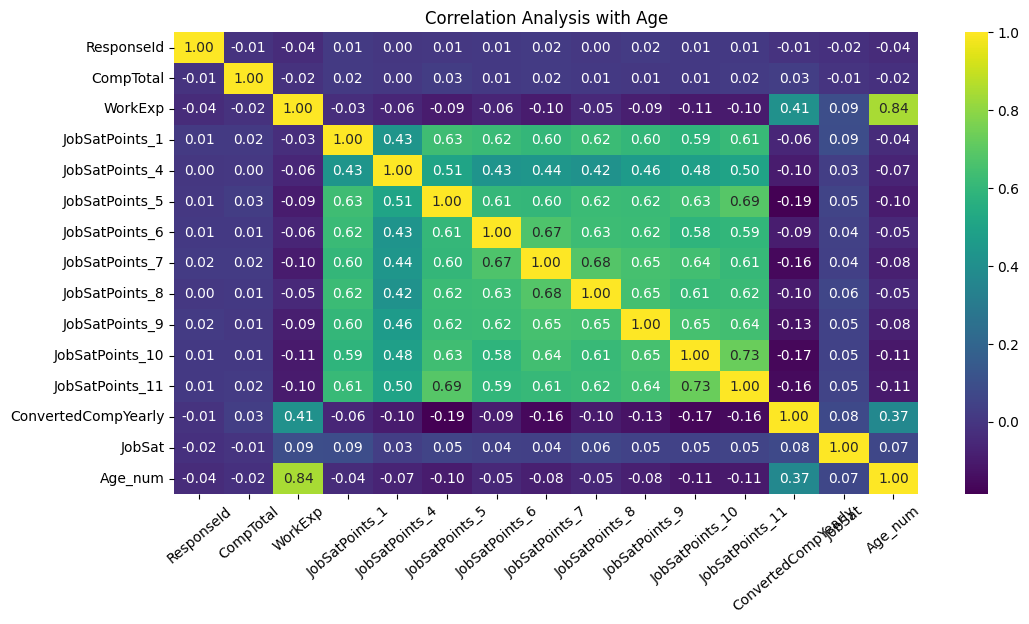

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(cor1,annot=True, fmt=".2f", cmap='viridis')
plt.title('Correlation Analysis with Age')
plt.xticks(rotation=40)
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
